# Plotting with pandas

In [1]:
import pandas as pd
fruit = pd.DataFrame({'name': ['Apple','Banana','Orange','Pear'],
         'count': [20,40,30,10],
         'price': [0.99,0.50,1.25,1.25]})

name  count  price
0   Apple     20   0.99
1  Banana     40   0.50
2  Orange     30   1.25
3    Pear     10   1.25

<AxesSubplot:>

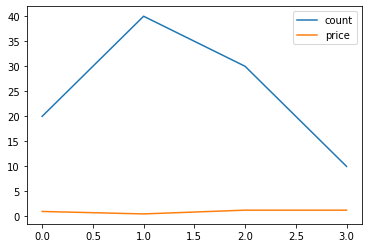

In [2]:
fruit.plot()

<AxesSubplot:xlabel='name'>

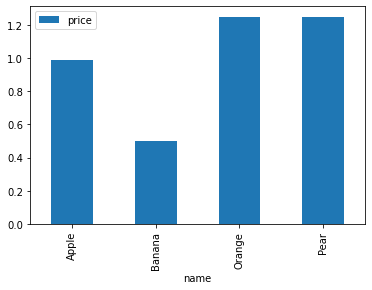

In [3]:
fruit.plot(kind='bar',x='name',y='price')

<BarContainer object of 4 artists>

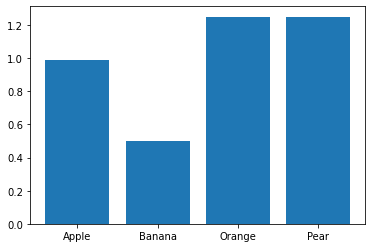

In [4]:
import matplotlib.pyplot as plt

plt.bar(x='name',height='price',data=fruit)

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not ['Apple' 'Banana' 'Orange' 'Pear']

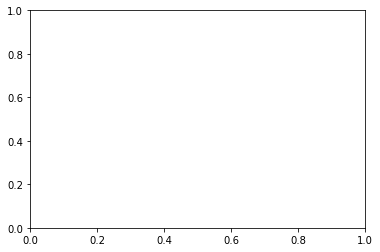

In [5]:
fruit.plot.scatter(x='price',y='count', c='name')

Text(0.5, 1.0, 'Fruit Prices')

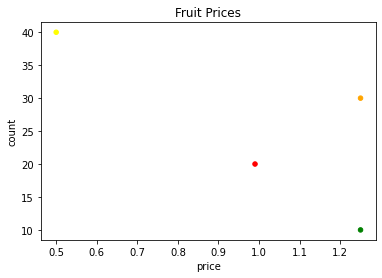

In [11]:
colors = {'Apple': 'red','Orange': 'orange','Banana': 'yellow','Pear': 'green'}
ax = fruit.plot.scatter(x='price',y='count', c=fruit['name'].map(colors))
ax.set_title('Fruit Prices')

<AxesSubplot:xlabel='price', ylabel='count'>

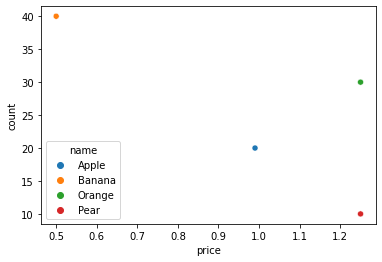

In [9]:
# may need to install seaborn
# %conda install -c conda-forge seaborn

import seaborn as sns
sns.scatterplot(x='price',y='count',hue='name', data=fruit)

# Altair

In [14]:
# may need to install altair
# %conda install -c conda-forge altair

import altair as alt
import pandas as pd

In [16]:
data = pd.DataFrame({
  'x': [1,3,4,6,10],
  'y': [1,5,2,7,3]
})

x  y
0   1  1
1   3  5
2   4  2
3   6  7
4  10  3

In [15]:
alt.Chart(data).mark_line().encode(
    x='x',
    y='y'
)

alt.Chart(...)

### Attribute Types

In [17]:
data = pd.DataFrame({
    'age': [1,3,4,6,10],
    'weight': [20,50,25,55,125],
    'zoo_area': [1,3,3,1,2],
    'num_scoops': [3,2,4,2,3]
})

age  weight  zoo_area  num_scoops
0    1      20         1           3
1    3      50         3           2
2    4      25         3           4
3    6      55         1           2
4   10     125         2           3

In [22]:
alt.Chart(data).mark_point(filled=True, size=100, stroke='black',strokeWidth=1).encode(
    x='age',
    y='weight',
    color='zoo_area' #:Q
)

alt.Chart(...)

In [20]:
alt.Chart(data).mark_point(filled=True, size=100, stroke='black',strokeWidth=1).encode(
    x='age',
    y='weight',
    color='zoo_area:O'
)

alt.Chart(...)

In [21]:
alt.Chart(data).mark_point(filled=True, size=100, stroke='black',strokeWidth=1).encode(
    x='age',
    y='weight',
    color='zoo_area:N'
)

alt.Chart(...)

In [23]:
# Bubble Chart

data = pd.DataFrame({
    'age': [1,3,4,6,10, 11,7,5,9,9],
    'weight': [20,50,25,55,125, 20,50,25,55,125],
    'zoo_area': [1,3,3,1,2, 1,3,3,1,2],
    'num_scoops': [3,2,4,2,3,10,5,7,90,120]
})

alt.Chart(data).mark_point(filled=True, stroke='black',strokeWidth=1).encode(
    x='age',
    y='weight',
    color='zoo_area:N',
    size='num_scoops'
)

alt.Chart(...)

### Concatenation, Layering, and Repetition

In [24]:
c1 = alt.Chart(data).mark_point(filled=True, stroke='black',strokeWidth=1).encode(
    x='age',
    y='weight',
    color='zoo_area:N',
    size='num_scoops'
)

alt.Chart(...)

In [25]:
c2 = alt.Chart(data).mark_bar().encode(
    x='zoo_area:N',
    y='count()'
)

alt.Chart(...)

In [26]:
c1 | c2

alt.HConcatChart(...)

In [27]:
c1 & c2

alt.VConcatChart(...)

In [28]:
data = pd.DataFrame({
  'x': [1,3,4,6,10],
  'y': [1,5,2,7,3]
})

lines = alt.Chart(data).mark_line().encode(
    x='x',
    y='y'
)

dots = alt.Chart(data).mark_point(size=150, shape='diamond', color='red',filled=True).encode(
    x='x',
    y='y'
)

lines

alt.Chart(...)

In [29]:
dots

alt.Chart(...)

In [30]:
lines + dots

alt.LayerChart(...)

In [31]:
penguins = 'https://raw.githubusercontent.com/vega/vega-datasets/master/data/penguins.json'

alt.Chart(penguins).mark_point().encode(
    alt.X("Beak Length (mm):Q", scale=alt.Scale(zero=False)),
    alt.Y("Beak Depth (mm):Q", scale=alt.Scale(zero=False)),
    color='Species:N'
)

alt.Chart(...)

In [32]:
penguins = 'https://raw.githubusercontent.com/vega/vega-datasets/master/data/penguins.json'

alt.Chart(penguins).mark_point().encode(
    alt.X(alt.repeat("row"), type='quantitative', scale=alt.Scale(zero=False)),
    alt.Y(alt.repeat("column"), type='quantitative', scale=alt.Scale(zero=False)),
    color='Species:N'
).properties(
    width=200,
    height=200
).repeat(
    row=['Beak Length (mm)', 'Beak Depth (mm)', 'Flipper Length (mm)'],
    column=['Beak Length (mm)', 'Beak Depth (mm)', 'Flipper Length (mm)']
).interactive()

alt.RepeatChart(...)

In [ ]:
# %conda install -c conda-forge vega_datasets

In [34]:
import altair as alt
from vega_datasets import data

states = alt.topo_feature(data.us_10m.url, 'states')
source = data.income.url

alt.Chart(source).mark_geoshape().encode(
    shape='geo:G',
    color='pct:Q',
    tooltip=['name:N', 'pct:Q'],
    facet=alt.Facet('group:N', columns=2),
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(data=states, key='id'),
    as_='geo'
).properties(
    width=300,
    height=175,
).project(
    type='albersUsa'
)

alt.Chart(...)